# **Project 10: K-means Clustering**
## Tiffany


### **Introduction**

Imagine you are a data scientist working for a marketing analytics company called **ShopSmart Analytics**. Your current client is a large shopping mall that wants to better understand its customers in order to design targeted marketing strategies and **personalized** offers.

Unfortunately, the mall does not have customer labels or predefined categories, they only have a dataset containing customer demographic and spending information.

Your task is to apply unsupervised learning, specifically the **K-Means clustering** algorithm, to segment the customers into meaningful groups based on their characteristics.

You will be working with the Mall Customer Segmentation Dataset available on Kaggle:
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

The dataset includes the following features:

- Gender

- Age

- Annual Income (k$)

- Spending Score (1-100)

Since no labels are provided, you will use K-Means to:

- Discover if there are natural groupings within the customers.

- Interpret the resulting clusters and provide recommendations to the marketing team.

**Please ensure that all functions you implement include comprehensive docstrings with all the necessary components. The first method's docstring is provided for you as an example.**


In [ ]:
# Please do not import any other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

## **Q1 -Data Preprocessing**

**Q 1.1** Load the Mall Customer Segmentation Dataset, display the first few rows, and print the shape of the DataFrame.

In [ ]:
# Write your code here
df = pd.read_csv('Mall_Customers.csv')
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Q 1.2** Verify that the dataset contains no missing values. Also, drop the CustomerID column, as it is only a unique identifier and not useful for clustering.

In [ ]:
# Write your code here
df.isnull().sum()
df.drop('CustomerID', axis=1, inplace=True)


In [ ]:
# Write your code here
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Q 1.3** Convert the **Gender** column into a numerical format using 0 and 1. Also, print the last few rows of the dataset.

Note: *The dataset uses a binary classification for gender (Male/Female), which does not reflect the full spectrum of gender identities. This simplification is a limitation of the dataset itself.*

In [ ]:
# Write your code here
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.tail()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18
199,0,30,137,83


In [ ]:
# Write your code here
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## **Q2 - Exploratory Data Analysis (EDA)**

**Q 2.1** Plot the distribution of the Annual Income (k$) feature using an appropriate visualization.

**Q 2.2** Plot the Spending Score Distribution.

**Q 2.3** Create a pairplot (or scatter matrix). Use colors or hues if you find it helpful for distinguishing data patterns.

**Q 2.4** Answer the following questions:

- From 2.1. Describe the distribution.
- From 2.2. Briefly describe the distribution.
- From 2.3. Write a short paragraph summarizing any interesting patterns or relationships you observe in the pairplot.

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

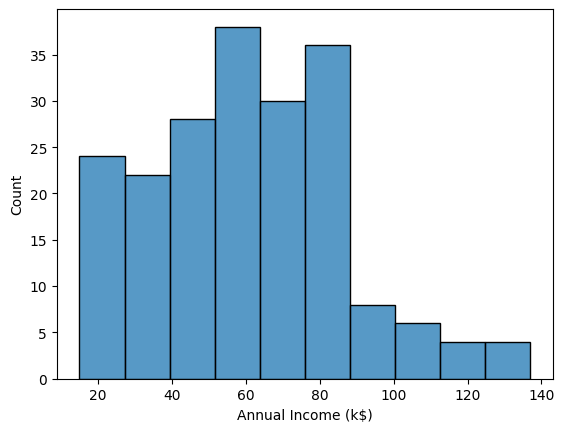

In [ ]:
# Write your code here
sns.histplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

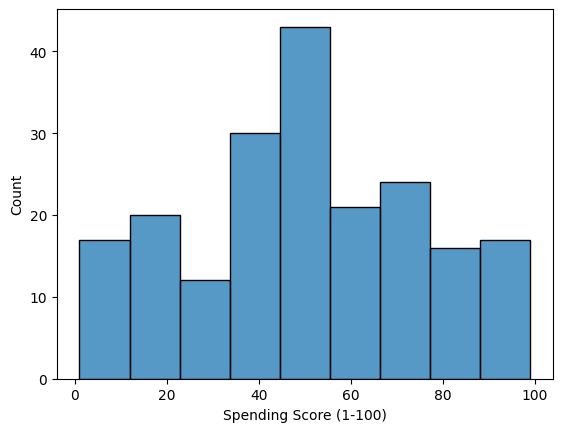

In [ ]:
# Write your code here
sns.histplot(df['Spending Score (1-100)'])


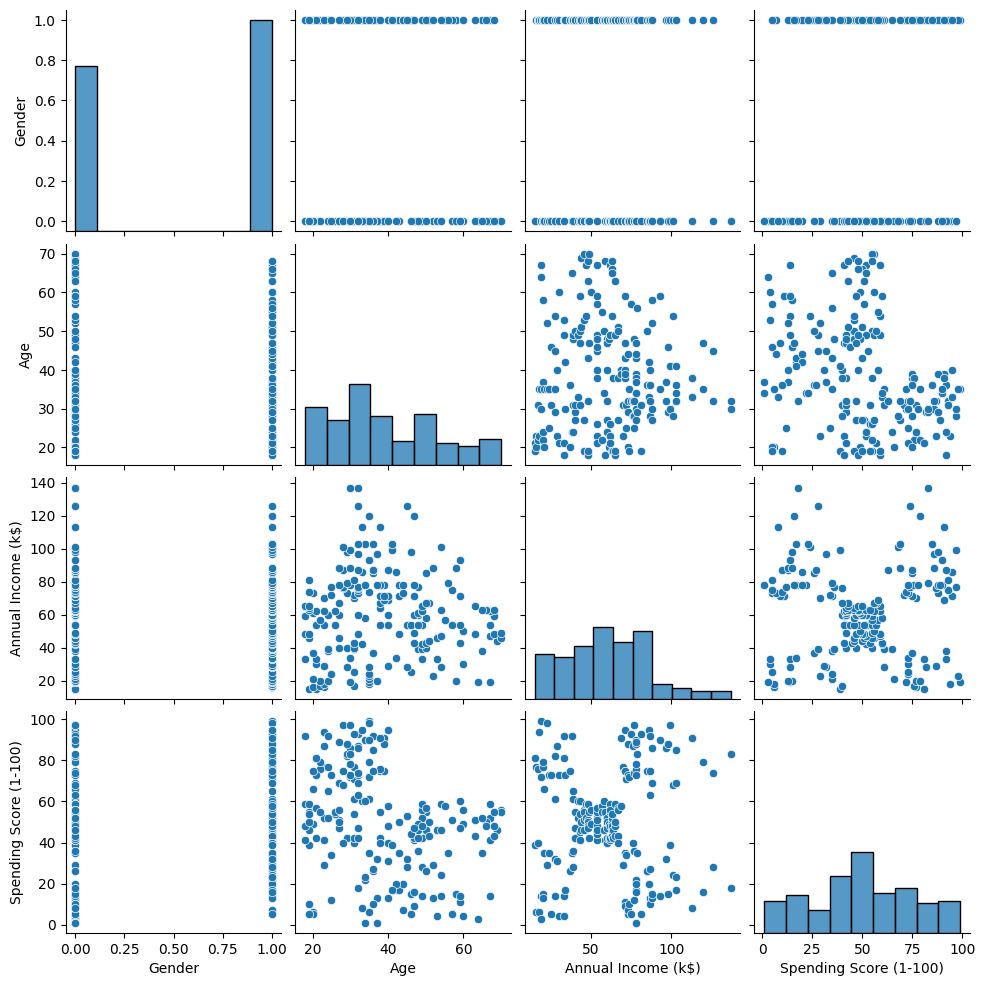

In [ ]:
# Write your code here
sns.pairplot(df)


**Q 2.4 Answer:**

2.1. 30-35 Customers have annual incomes that fall in the range of 40k-90k. It hit sits peak at 90k (declines).

2.2- the spending score here is multimodal. with peaks at 43-ish customers and smaller groups haaving a spread across high and low ranges.

2.3 - Gender distribution is very distinct in the graphs, as it is usually just male or female. Age shows a non linear data pattern. Annual income has a particular cluster.

## **Q3 - Simple KMeans**

**Q 3.1** Create a K-Means model using `KMeans` estimatir from **sklearn.cluster** with k = 5 clusters.

**Q 3.2** Create a scatter plot to visualize the clustering results.

- For the plot, use Annual Income for the x-axis and Spending Score for the y-axis. Color-code the points accordingly.

In [ ]:
# Write your code here
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
clusters = kmeans.labels_

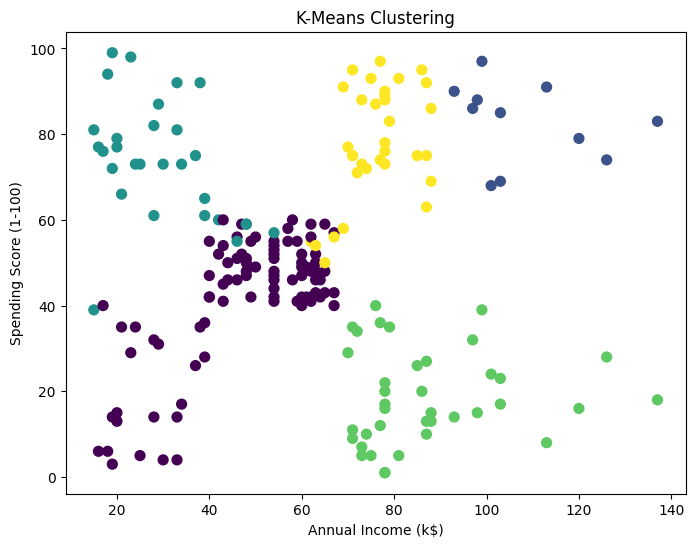

In [ ]:
plt.figure(figsize=(8,6))

# Scatter plot: Income vs Spending Score
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=clusters, cmap='viridis', s=50)

# complete the plot
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.show()

## **Q4 - Elbow Method and Silhouette Analysis**

In this part, you will use two common techniques to help decide a suitable value for k in K-Means clustering.

**Q 4.1** **The Elbow Method** helps determine the appropriate number of clusters by analyzing the inertia, which is the total within-cluster sum of squared distances between data points and their respective centroids. As k increases, inertia decreases, since each cluster has fewer points and they're closer to their centroid.

However, after a certain point, the rate of improvement slows down. This point of diminishing returns is known as the "elbow", and it is often considered a good value for k.

- Compute and store the inertia values for k = 1 through 10.
- Plot inertia vs number of clusters.



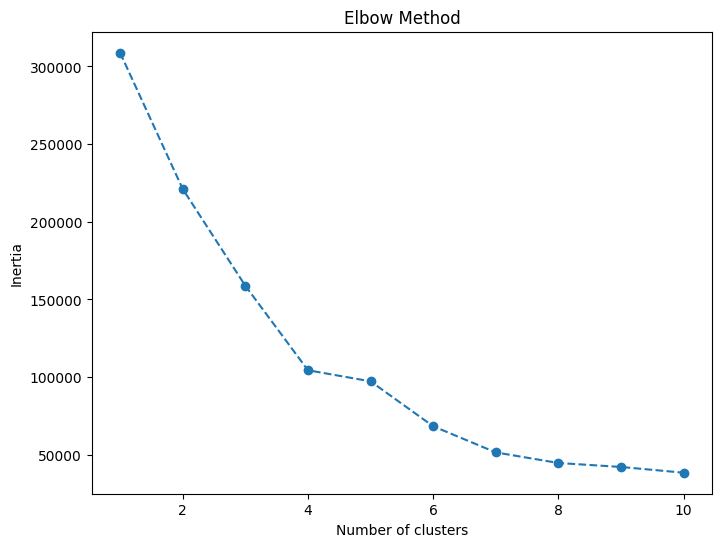

In [ ]:
inertia = []
for i in range(1,11):
  #write your code here
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

# Plot for elbow method
plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


**Q 4.2** The **Silhouette Score** measures how well-separated the clusters are. For each data point, it considers:

- How close the point is to other points in its own cluster (cohesion), and
- How far the point is from points in the nearest neighboring cluster (separation).

The score ranges from -1 to 1: +1 means the point is well-matched to its cluster and poorly matched to others. 0 means the point lies between two clusters. Negative values suggest the point may be in the wrong cluster.

- Compute the silhouette score for k = 2 to k = 10.
- Plot silhouette score vs. number of clusters.

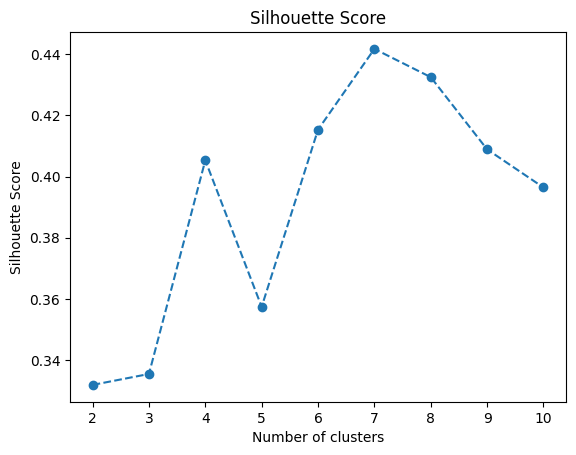

In [ ]:
silhouette_scores = []

# Try k from 2 to 10 (Silhouette requires at least k=2)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))


# Plot the silhouette
plt.figure
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



**Q 4.3** Compare the results of the Elbow Method and the Silhouette Analysis.

Write a brief paragraph discussing:

- What patterns or elbows you observe.

- Which value of k seems most appropriate.

- Why you chose that value, based on the evidence from both methods.

- there is an elbow at k =5, the rate of decrease in inertia slows down,
- the value of k that seems the most appropriate would be 6 because since it bends at 5 that means the score peaks at 6 which would mean the clusters are clearly defined and well seperated and justifies customer seperation more.


# **Part 2: Implementation of K-Means**

We will implement the Algorithm 8.1 "Basic K-means algorithm", from our optional textbook, *Introduction to Data Mining*, (a screenshot of this algorithm from the book provided for you in the assignment documents) and apply that algorithm to a small data set provided with the assignment in the `data_kmeans.csv` file. We will build up some helper functions along the way, test them, and put it all together to apply to our small example data set.

---

## NOTE:

You will only implement the last few code sections, most of the functions will be provided to you. Please make sure you understand what the code is doing before moving on to the last coding questions.

In [ ]:
df_kmeans = df

## **Function that returns `k` random rows from a data frame**

**A)** To initialize the centroids, we pick `k` random points from a data frame.  Function `init_centroids( df_data, k )` accepts two parameters: a data frame `df_data`, and an integer `k`, and returns the initial centroids for our k-means algorithm.  Note, we want the indices of the returned dataframe to range from 0 - (k-1) so that we can use these as the centroid labels.

In [ ]:
def init_centroids( df_data, k ):
  '''Initialize 'k' centroids from the given dataframe.

    Parameters:
    - df_data (pd.DataFrame): The input dataframe from which centroids will be initialized.
    - k (int): The number of centroids to initialize.

    Returns:
    - pd.DataFrame: A dataframe containing 'k' randomly selected data points from `df_data`.
  '''
  return df_data.sample(n=k, random_state=42).reset_index(drop=True)

**B)** Call the `init_centroids` function with the dataframe you created earlier


In [ ]:
df_centroids = init_centroids( df_kmeans, k=6 )
df_centroids

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,24,60,52
1,0,22,20,79
2,0,60,30,4
3,0,34,78,1
4,0,59,71,11
5,1,19,65,50












'








In [ ]:
def assign_to_centroid( df_data, df_centroids ):
    '''
    Assign each data point in `df_data` to the nearest centroid from `df_centroids`.

    Parameters:
    - df_data (pd.DataFrame): The input dataframe containing data points to be assigned to centroids.
    - df_centroids (pd.DataFrame): The dataframe containing centroid coordinates.

    Returns:
    - pd.Series: A series containing the index of the nearest centroid for each data point in `df_data`.

    Example:
    >>> df_data = pd.DataFrame({'A': [1, 4, 7], 'B': [2, 5, 8]})
    >>> df_centroids = pd.DataFrame({'A': [1, 7], 'B': [2, 8]})
    >>> assign_to_centroid(df_data, df_centroids)
    0    0
    1    0
    2    1
    dtype: int64
    '''
    centroid_index = []
    for indx,row in df_data.iterrows():
        # write your code here
        distances = np.linalg.norm(df_centroids - row, axis=1)
        closest = distances.argmin()
        centroid_index.append(closest)
    return pd.Series(centroid_index)

[link text](https:// [link text](https://)) [link text](https://)**B)** Check how many data points were assigned to each centroid

In [ ]:
s_centroid_assignment = assign_to_centroid( df_kmeans, df_centroids )
s_centroid_assignment.value_counts()

,count
0,88
5,27
1,24
2,22
3,21
4,18


## **Function that recomputes the centroids**

Function `compute_centroids()` takes two parameters: the data frame, `df_data` containing the data being clustered, and a series of the same length that contains the label of the assigned centroid for every row in df_data, `s_centroid_assignment`. The function will return a data frame containing the centroids (mean) value for each unique centroid.

Note that the indices in the returned data frame should correspond to the unique values in `s_centroid_assignment`.  For example, if I found the mean value of df_data using the slice corresponding to `s_centroid_assigment == 2`, then the centroid should be in the returned data frame at `.iloc[2]`.

In [ ]:
def compute_centroids( df_data, s_centroid_assignment ):
    '''Compute the new centroids based on the mean of data points assigned to each centroid.

    Parameters:
    - df_data (pd.DataFrame): The input dataframe containing data points.
    - s_centroid_assignment (pd.Series): A series indicating the centroid assignment for each data point.

    Returns:
    - pd.DataFrame: A dataframe containing the new centroids, computed as the mean of data points assigned to each centroid.
    '''
    df_new_centroids = pd.DataFrame(columns=df_data.columns)
    for c in range(s_centroid_assignment.max()+1):
        # get all indices of points that were closest to this centroid
        rows =  df_data.loc[s_centroid_assignment == c]
        # get mean of coresponding rows and add to result
        df_new_centroids.loc[c] = rows.mean()

    return df_new_centroids

**Check your results by calling your method**

In [ ]:
df_new_centroids = compute_centroids(df_kmeans, s_centroid_assignment)
df_new_centroids

AttributeError: 'DataFrame' object has no attribute 'append'

## **Part 2 - Q1 - Write a function that compares two centroid data frames**

The stopping criterion for k-means is when our centroids have not moved since the last iteration.  Write a function `compare_centroids` that is given 2 centroid data frames, `df_centroid_a`, and `df_centroid_b` as parameters and returns `True` or `False` indicating if the centroids at each unique index in the data frame are equal. Use the [equals](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.equals.html) method to compare equality of pandas Series objects.  Your function must have proper docstring.

In [ ]:
def compare_centroids( df_centroid_a, df_centroid_b ):
  # WRITE YOUR CODE HERE
  '''

  Parameters:
  - df_centroid_a (pd.DataFrame): The first dataframe containing centroid data.
  - df_centroid_b (pd.DataFrame): The second dataframe containing centroid data.
  '''
  for index in range(len(df_centroid_a)):
      if not df_centroid_a.loc[index].equals(df_centroid_b.loc[index]):
          return False
  return True

**Test your implementation by calling your function. It should print `True`, followed by `False`**

In [ ]:
print(compare_centroids( df_new_centroids, df_new_centroids ))
print(compare_centroids( df_new_centroids, df_centroids ))

NameError: name 'df_new_centroids' is not defined

## **Part 2 - Q2 - Write a function that implements k-means**

Write a function, `k_means`, that takes in as parameters 2 values, a data frame with values to cluster, `df_data`, and the number of clusters to form, `k`.  The function should return a series of data of the same length as `df_data` that contains the cluster assignment (an integer from 0 to (k-1)) for each row of data.  Use the helper functions defined in the prior questions. Your function must have proper docstring.

In [ ]:
def k_means(df_data, k):
    '''
    Performs k-means clustering on the input data.

    Parameters:
    - df_data (pd.DataFrame): The dataset to cluster.
    - k (int): The number of clusters to form.

    Returns:
    - pd.Series: A series of cluster assignments (integers from 0 to k-1)
      for each row in the input dataframe.
    '''
    df_centroids = init_centroids(df_data, k)

    while True:
        s_cluster_assignment = assign_to_centroid(df_data, df_centroids)

        df_new_centroids = compute_centroids(df_data, s_cluster_assignment)

        if compare_centroids(df_centroids, df_new_centroids):
            break
        else:
            df_centroids = df_new_centroids

    return s_cluster_assignment


**Call your function with `k=5` and observe the results**

In [ ]:
s_cluster_assignment = k_means( df_kmeans, 5 )
s_cluster_assignment.value_counts()

## **Plot the results**

Use the code below to plot the points in the `df_kmeans` data frame using a 2-D scatter plot, with a different color for each cluster.

In [ ]:
for k in s_cluster_assignment.unique():
    plt.plot(df_kmeans['Annual Income (k$)'][s_cluster_assignment == k],df_kmeans['Spending Score (1-100)'][s_cluster_assignment == k], '.', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means Scatter Plot with Color Representing Clusters')
plt.show()